Epoch [1/10], Loss: 0.30074501037597656, Training Accuracy: 0.8472
Epoch [2/10], Loss: 0.22707201540470123, Training Accuracy: 0.8923333333333333
Epoch [3/10], Loss: 0.48163163661956787, Training Accuracy: 0.9005666666666666
Epoch [4/10], Loss: 0.3047030568122864, Training Accuracy: 0.90435
Epoch [5/10], Loss: 0.1578148752450943, Training Accuracy: 0.9085666666666666
Epoch [6/10], Loss: 0.37549179792404175, Training Accuracy: 0.9104833333333333
Epoch [7/10], Loss: 0.2285916954278946, Training Accuracy: 0.9121166666666667
Epoch [8/10], Loss: 0.3818643391132355, Training Accuracy: 0.9134833333333333
Epoch [9/10], Loss: 0.4405556619167328, Training Accuracy: 0.9147166666666666
Epoch [10/10], Loss: 0.3222833275794983, Training Accuracy: 0.9154666666666667


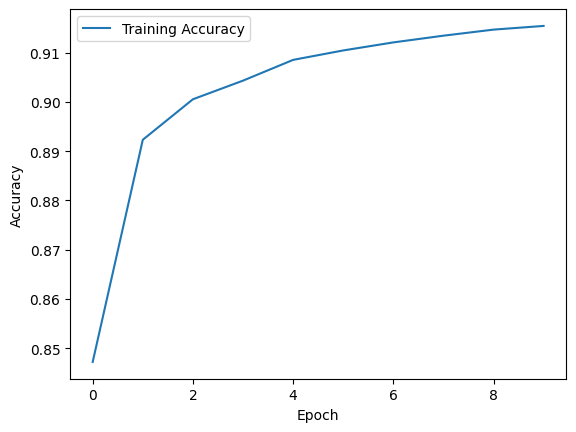

Test Accuracy: 0.9197


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders
batch_size = 64
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Initialize the SVM model
input_size = 28 * 28  # MNIST images are 28x28 pixels
num_classes = 10  # 10 classes (digits 0-9)
svm_model = nn.Linear(input_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(svm_model.parameters(), lr=0.01)

# Training
num_epochs = 10
train_accuracy_history = []

for epoch in range(num_epochs):
    svm_model.train()
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = svm_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_accuracy_history.append(train_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Training Accuracy: {train_accuracy}')

# Plot training accuracy
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing
svm_model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)
        outputs = svm_model(images)
        _, predicted_test = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_accuracy = correct_test / total_test
print(f'Test Accuracy: {test_accuracy}')
